DOES THE PUBLIC SENTIMENT HAVE AN EFFECT ON CRYPTOCURRENCY PRICE CHANGE?

https://github.com/uic-cs418/cs418-spring22-sixth-sense/blob/main/CS418_Sixth_Sense.ipynb

INTRODUCTION

Cryptocurrency has been a fast-growing technology that has become more widely accepted. In recent years, prices for cryptocurrency have skyrocketed and much is still not known about the causes behind these price fluctuations. Due to cryptocurrency not being controlled by any authority or being backed by any real items, its main price influence is due to the public. Thus, our project wants to explore the relation between public sentiment of cryptocurrency and whether or not it affects the price of coins.

CHANGES

N/A

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.pyplot import figure
import nltk
import sklearn
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


DATA CLEANING

For our data cleaning, we first started with a dataset of hundreds of cryptocurrencies and their prices tracked by date through 2013-2018. The dates were converted from UNIX time to a universal datetime. In addition, only the price and dates columns were kept. Because there are hundreds of cryptocurrencies, we filtered out only the top 5-10 most popular, which capture almost all of the most valuable cryptocurrencies. eg. Bitcoin, Ethereum, etc.

In [25]:
crypto_prices_df = pd.read_csv('chasewillden-cryptocurrency-price-by-date-2013-february-2018/chasewillden-cryptocurrency-price-by-date-2013-february-2018/data/cryptocurrency_prices_by_date.csv')

# Extract prices for the timeframe 01/01/2015 - 12/31/2018
# 2015-01-01 00:00:00  => 1420070400000
# 2018-12-31 23:59:59 => 1546261199000
crypto_prices_df = crypto_prices_df[(crypto_prices_df['date'] >= 1420070400000) & (crypto_prices_df['date'] <= 1546261199000)]

# Convert Unix time to Date time
crypto_prices_df['date'] = pd.to_datetime(crypto_prices_df['date'], unit='ms')
crypto_prices_df['Year'] = crypto_prices_df['date'].dt.year
crypto_prices_df['Month'] = crypto_prices_df['date'].dt.month
crypto_prices_df['Day'] = crypto_prices_df['date'].dt.day
crypto_prices_df[(crypto_prices_df['currency'] == 'bitcoin')].head(10)

,currency,date,price,Year,Month,Day
64769,bitcoin,2015-01-01 02:40:00,317.848,2015,1,1
64770,bitcoin,2015-01-02 00:53:20,313.639,2015,1,2
64771,bitcoin,2015-01-03 01:53:20,314.870,2015,1,3
64772,bitcoin,2015-01-04 00:06:40,281.246,2015,1,4
64773,bitcoin,2015-01-05 01:06:40,266.723,2015,1,5
64774,bitcoin,2015-01-06 02:06:40,274.168,2015,1,6
64775,bitcoin,2015-01-07 00:20:00,283.238,2015,1,7
64776,bitcoin,2015-01-08 01:20:00,293.754,2015,1,8
64777,bitcoin,2015-01-09 02:20:00,282.507,2015,1,9
64778,bitcoin,2015-01-10 08:53:20,277.861,2015,1,10


EDA:

This dataframe is what our data looks like after we've cleaned the data. 

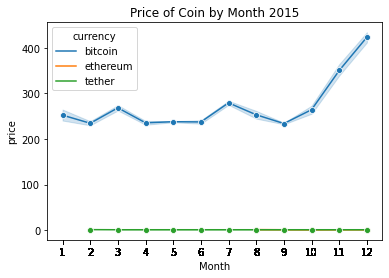

In [8]:
popular_cryptos2 = ['bitcoin','ethereum', 'tether', 'binance-coin', 'cardano']
prices_of_popular_cryptos2 = crypto_prices_df[crypto_prices_df['currency'].isin(popular_cryptos2)]
price_2015 = prices_of_popular_cryptos2[(prices_of_popular_cryptos2['Year']==2015)]
ax = sns.lineplot(data=price_2015, x='Month', y='price', hue='currency',marker='o')
ax.set(xticks=prices_of_popular_cryptos2.Month.values)
ax.set_title('Price of Coin by Month 2015')
plt.show()



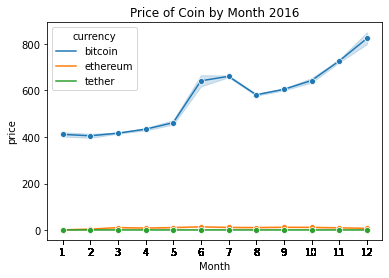

In [9]:

price_2016 = prices_of_popular_cryptos2[(prices_of_popular_cryptos2['Year']==2016)]
ax = sns.lineplot(data=price_2016, x='Month', y='price', hue='currency',marker='o')
ax.set(xticks=prices_of_popular_cryptos2.Month.values)
ax.set_title('Price of Coin by Month 2016')
plt.show()

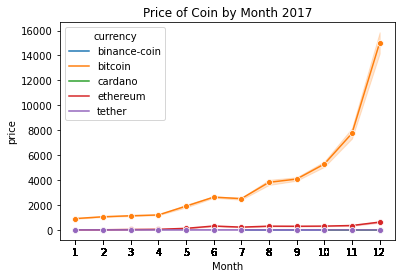

In [10]:

price_2017 = prices_of_popular_cryptos2[(prices_of_popular_cryptos2['Year']==2017)]
ax = sns.lineplot(data=price_2017, x='Month', y='price', hue='currency',marker='o')
ax.set(xticks=prices_of_popular_cryptos2.Month.values)
ax.set_title('Price of Coin by Month 2017')
plt.show()

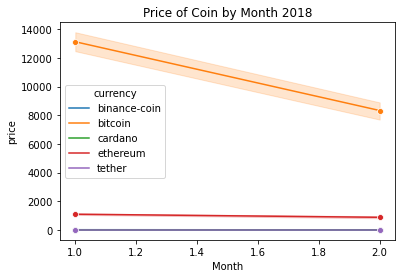

In [11]:
price_2018 = prices_of_popular_cryptos2[(prices_of_popular_cryptos2['Year']==2018)]
ax = sns.lineplot(data=price_2018, x='Month', y='price', hue='currency',marker='o')
ax.set_title('Price of Coin by Month 2018')
plt.show()

In [28]:
#popular_cryptos = ['bitcoin','ethereum', 'tether', 'binance-coin', 'litecoin', 'dogecoin', 'cardano', 'monero', 'ripple']
#
#prices_of_popular_cryptos = crypto_prices_df[crypto_prices_df['currency'].isin(popular_cryptos)]
#
#prices_of_popular_cryptos.drop_duplicates('currency', keep='last')
#monthly_avg_prices = crypto_prices_df[crypto_prices_df['currency'].isin(popular_cryptos)].groupby(
#    ["Year","currency"],as_index=True).mean().reset_index()
#monthly_avg_prices


In [14]:
news = pd.read_json('cryptodata/news.json')
reddit = pd.read_json('cryptodata/reddit.json')
bitcoinTalk = pd.read_json('cryptodata/bitcointalk.json')

In [15]:
news = news[(news['date'].dt.year >= 2015) & (news['date'].dt.year <= 2018)]
reddit = reddit[(reddit['date'].dt.year >= 2015) & (reddit['date'].dt.year <= 2018)]
bitcoinTalk = bitcoinTalk[(bitcoinTalk['date'].dt.year >= 2015) & (bitcoinTalk['date'].dt.year <= 2018)]

print(len(news))
print(len(reddit))
print(len(bitcoinTalk))

#reddit.head(5)
#bitcoinTalk.head(5)
news.head(5)

63252
2752380
1642540


,text,post_id,date
9698,Venture capitalist Lou Kerner says bitcoin is ...,9783,2018-12-31 23:37:58
9699,"Charlie Lee, the creator of Litecoin and the m...",9784,2018-12-31 23:30:27
9700,As crypto’s value has dropped across the board...,9785,2018-12-31 23:24:38
9701,Hacks and heists have been a threat for as lon...,9786,2018-12-31 23:05:03
9702,It’s been over a year ...,9787,2018-12-31 22:46:45


In [16]:
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month
reddit['year'] = reddit['date'].dt.year
reddit['month'] = reddit['date'].dt.month
bitcoinTalk['year'] = bitcoinTalk['date'].dt.year
bitcoinTalk['month'] = bitcoinTalk['date'].dt.month

In [17]:
news.head()

,text,post_id,date,year,month
9698,Venture capitalist Lou Kerner says bitcoin is ...,9783,2018-12-31 23:37:58,2018,12
9699,"Charlie Lee, the creator of Litecoin and the m...",9784,2018-12-31 23:30:27,2018,12
9700,As crypto’s value has dropped across the board...,9785,2018-12-31 23:24:38,2018,12
9701,Hacks and heists have been a threat for as lon...,9786,2018-12-31 23:05:03,2018,12
9702,It’s been over a year ...,9787,2018-12-31 22:46:45,2018,12


In [18]:
news_per_year = news.groupby(['year']).size().to_frame('size').reset_index()
news_per_month = news.groupby(['year','month']).size().to_frame('size').reset_index()
reddit_per_year = reddit.groupby(['year']).size().to_frame('size').reset_index()
reddit_per_month = reddit.groupby(['year','month']).size().to_frame('size').reset_index()
bitcoinTalk_per_year = bitcoinTalk.groupby(['year']).size().to_frame('size').reset_index()
bitcoinTalk_per_month = bitcoinTalk.groupby(['year','month']).size().to_frame('size').reset_index()



In [19]:
news_per_year.head()
# news_per_month.head(15)
# reddit_per_year.head()
# reddit_per_month.head(15)
# bitcoinTalk_per_year.head()
# bitcoinTalk_per_month.head(15)

,year,size
0,2016,1
1,2017,8366
2,2018,54885


In [20]:
news_per_year.loc[-1] = [2015,0]
news_per_year.index = news_per_year.index + 1  # shifting index
news_per_year.sort_index(inplace=True) 
print(news_per_year)

   year   size
0  2015      0
1  2016      1
2  2017   8366
3  2018  54885


C:\Users\nicho\AppData\Local\Temp/ipykernel_21280/168883124.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


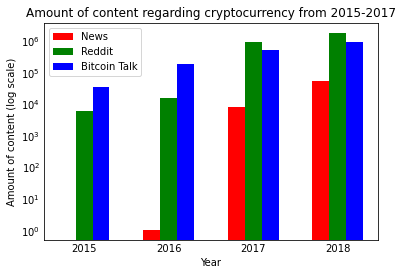

In [21]:
fig,ax = plt.subplots()
index = np.arange(max(len(reddit_per_year['year']), len(news_per_year['year']), len(bitcoinTalk_per_year['year'])))
bar_width = 0.2
opacity = 0.8


ax.bar(index-bar_width, news_per_year['size'], color='r', width=bar_width, label='News')
ax.bar(index, reddit_per_year['size'], color='g', width=bar_width, label='Reddit')
ax.bar(index+bar_width, bitcoinTalk_per_year['size'], color='b', width=bar_width, label='Bitcoin Talk')

ax.set_yscale('log')
ax.tick_params(axis=u'both', which=u'both',length=0)
labels = ['','2015','','2016','','2017','','2018','']
ax.set_xticklabels(labels)

plt.xlabel('Year')
plt.ylabel('Amount of content (log scale)')
plt.title('Amount of content regarding cryptocurrency from 2015-2017')
plt.legend(loc='best')

plt.show()

EDA:

From our visualization, we see that we don't have any news data for 2015 and 2016. We believe sentiment analysis on news to be a bit more credible than Reddit and Bitcoin Talk because on those online websites, anyone can post a comment. Thus, our data is making us look more closely at 2017 and 2018 which are interesting years for cryptocurrency (meteoric spike for Bitcoin, etc.). Our hypothesis was that positive public sentiment will cause increase in cryptocurrency prices. This is important because with cryptocurrency becoming more mainstream, knowing the mechanisms behind price fluctuations will be paramount for investing, predicting the future, and more.

In [30]:
#sentiment analysis using vader
sid = SentimentIntensityAnalyzer()
news['scores'] = news['text'].apply(lambda text: sid.polarity_scores(text))
news['compound']  = news['scores'].apply(lambda score_dict: score_dict['compound'])
news['comp_score'] = news['compound'].apply(lambda c: 1 if c >=0 else -1)
news = news.drop(['scores', 'compound'], axis = 1)
news["Date_extracted"] = news["date"].dt.date
def text_extracting(data):
    data = word_tokenize(data)
    for i in range(len(data)):
        if data[i] == 'bitcoin':
            return 'bitcoin'
        elif data[i] == 'ethereum':
            return 'ethereum'
        elif data[i] == 'tether':
            return 'tether'
        elif data[i] == 'binance-coin':
            return 'binance-coin'
        elif data[i] == 'cardano':
            return 'cardano'
    return 'rest'
news['crypto'] = news['text'].apply(text_extracting)
news = news.sort_values('Date_extracted')
#news['Year'] = news['date'].dt.year
news['Month'] = news['date'].dt.month
news['Day'] = news['date'].dt.day
news.head()


,text,post_id,date,year,month,comp_score,Date_extracted,crypto,Year,Month,Day
78901,SuperNET Weekly No. 13CORE and CORE Media were...,79011,2016-06-04,2016,6,1,2016-06-04,rest,2016,6,4
38830,This week we have several updates about Waves ...,38915,2017-02-13,2017,2,1,2017-02-13,bitcoin,2017,2,13
78900,WAVES Weekly No. 30This week we have several u...,79010,2017-02-13,2017,2,1,2017-02-13,bitcoin,2017,2,13
78899,WAVES Weekly No. 31Last week has seen a number...,79009,2017-02-20,2017,2,1,2017-02-20,bitcoin,2017,2,20
38829,Last week has seen a number of updates that sh...,38914,2017-02-20,2017,2,1,2017-02-20,bitcoin,2017,2,20


ML:

We used sentiment analysis from Vader on the news dataset, and obtained a "comp_score" which is 1 for positive, -1 for negative. By averaging the sentiment over each month per year, we can then compare the prices of coins per year with their public sentiment.

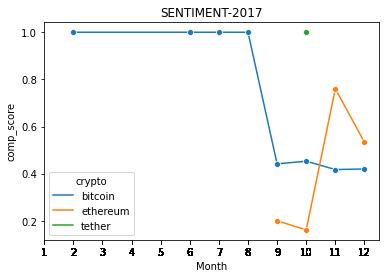

In [31]:
popular_cryptos2 = ['bitcoin','ethereum', 'tether']
news_of_popular_cryptos2 = news[news['crypto'].isin(popular_cryptos2)]
news_2017 = news_of_popular_cryptos2[(news_of_popular_cryptos2['Year']==2017)]
ax = sns.lineplot(data=news_2017, x='Month', y='comp_score', hue='crypto',marker='o',ci= None)
ax.set(xticks=news_of_popular_cryptos2.Month.values)
plt.title('SENTIMENT-2017')
plt.show()

ML:

From our sentiment analysis done on 2017, we can see that public sentiment for Bitcoin has dropped sharply from overwhelmingly positive from August to September. However, from our price graphs, the price of bitcoin increased against our expectations.

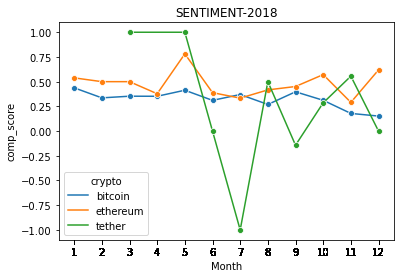

In [32]:
news_2018 = news_of_popular_cryptos2[(news_of_popular_cryptos2['Year']==2018)]
ax = sns.lineplot(data=news_2018, x='Month', y='comp_score', hue='crypto',marker='o',ci= None)
ax.set(xticks=news_of_popular_cryptos2.Month.values)
plt.title('SENTIMENT-2018')
plt.show()

In [33]:
#label creation depending on price variation
crypto_prices_df["Date_extracted"] = crypto_prices_df["date"].dt.date
crypto_prices_df = crypto_prices_df.sort_values('Date_extracted')
crypto_prices_df['price_variation'] = crypto_prices_df['price'].diff()
crypto_prices_df['price_raise/drop'] = np.where(crypto_prices_df['price_variation']>0, 1, -1)
crypto_prices_df = crypto_prices_df.groupby(['Date_extracted'])['price_raise/drop'].sum().reset_index()
crypto_prices_df['price_raise/drop'] = np.where(crypto_prices_df['price_raise/drop']>0,1,-1)
crypto_prices_df

,Date_extracted,price_raise/drop
0,2015-01-01,1
1,2015-01-02,-1
2,2015-01-03,1
3,2015-01-04,1
4,2015-01-05,1
...,...,...
1132,2018-02-06,-1
1133,2018-02-07,1
1134,2018-02-08,-1
1135,2018-02-09,-1


ML:

From the public sentiment, we can then add a label of whether or not the cryptocurrency price increased (+1) or decreased (-1) the next day. This will be our truth values for our machine learning model as our goal is to predict whether or not the price will increased based on public sentiment. We take a further at Bitcoin, which is by far the most valuable and most well-known coin. The ML model can be extended to the other coins fairly easily. 

In [34]:
#Bitcoin 
news_bitcoin = news[news['crypto']=='bitcoin']
news_bitcoin = news_bitcoin.groupby(['Date_extracted'])['comp_score'].sum().reset_index()
news_bitcoin['comp_score'] = np.where(news_bitcoin['comp_score']>0,1,-1)
news_bitcoin

,Date_extracted,comp_score
0,2017-02-13,1
1,2017-02-20,1
2,2017-06-15,1
3,2017-07-26,1
4,2017-08-15,1
...,...,...
469,2018-12-27,-1
470,2018-12-28,-1
471,2018-12-29,1
472,2018-12-30,1


In [36]:
#combining price and sentiment for bitcoin
bitcoin_price_sentiment = news_bitcoin.merge(crypto_prices_df, on = 'Date_extracted',how = 'inner')
bitcoin_price_sentiment

,Date_extracted,comp_score,price_raise/drop
0,2017-02-13,1,-1
1,2017-02-20,1,1
2,2017-06-15,1,1
3,2017-07-26,1,-1
4,2017-08-15,1,1
...,...,...,...
145,2018-02-06,1,-1
146,2018-02-07,1,1
147,2018-02-08,1,-1
148,2018-02-09,1,-1


In [37]:
x_train, x_test, y_train, y_test = train_test_split(bitcoin_price_sentiment['comp_score'], bitcoin_price_sentiment['price_raise/drop'])

In [45]:
class Bitcoin_label_baseline():
    
    def _init_(self):
        
        self.mode_value = 0 
                
    def fit(self, X, y):

        index = (crypto_prices_df['price_raise/drop']).max()
   
        self.mode_value = index
#         print(index)
        
    def predict(self, X):

        length = X.size
        y_predict = np.empty(length,dtype=int)
        for i in range(length):
            y_predict[i] = self.mode_value
        return y_predict

baselineClf = Bitcoin_label_baseline()

baselineClf.fit(x_train,y_train)
y_predict = baselineClf.predict(x_train)
sklearn.metrics.accuracy_score(y_train,y_predict)

0.45535714285714285

Our ML model with our current data has a final accuracy of 45.5%. This could be an indiction of many things such as our hypothesis being wrong, not having enough data, or training on the wrong metrics. We are looking more into this.

REFLECTION:

One of the hardest parts about the project has been wrangling the massive amounts of data into something usable. 

Our initial insight was that positive public sentiment would increased cryptocurrency price, but from our EDA we can see that this is not always the case. In fact, sometimes the price is the inverse of the public sentiment. 

Going forward, our biggest problem will be to train and tweak the machine learning model. If positive public sentiment is not directly correlated to price, then our machine learning model will have to train and capture the patterns that we humans can not see.

We think we are on track with the project.

Our belief is that it is worth proceeding with our project. Just because our initial insights were wrong, does not mean that it is not an interesting hypothesis to test.

NEXT STEPS:

Our next steps are to work more on the machine learning model and hopefully achieve a higher accuracy of predicting the price of cryptocurrency based on public sentiment. Our goal is to achieve 50%+ which means that it is better than randomly guessing whether or not the price will go up. If we require any additional EDA while working on the machine learning model, we will evaluate at the time and get it done.